In [9]:
import pandas as pd
import numpy as np
import os

In [ ]:
### 1. normal dataset
#here we use the balanced dataset with  activities for all activities or selected activities
data_path='./imu_files_all_complete_with_device_count_filtered.csv'
# data_path='./imu_files_balanced_20_activities.csv'
data_all=pd.read_csv(data_path)
# target_activity_id_ls=[11,12,13,22,9]
# target_activity_id_ls=[10,11,12,13,22,34,6,7,9]
target_activity_id_ls=data_all['activity_id_num'].unique()
target_activity_id_ls=list(range(0,40))
dataset_path='./data_imu/activity_40/'
os.makedirs(dataset_path, exist_ok=True)
print(data_all.shape)

(674, 17)


In [3]:
### 2. hybrid resampled dataset

data_path='./imu_files_all_complete_with_device_count_filtered_hybrid_resampled.csv'
data_all=pd.read_csv(data_path)
# target_activity_id_ls=[11,12,13,22,9]
# target_activity_id_ls=[10,11,12,13,22,34,6,7,9]
target_activity_id_ls=data_all['activity_id_num'].unique()
target_activity_id_ls=list(range(0,40))
dataset_path='./dataset/activity_40_hybrid_resampled/'

print(data_all.shape)


FileNotFoundError: [Errno 2] No such file or directory: './imu_files_all_complete_with_device_count_filtered_hybrid_resampled.csv'

In [12]:
# ******cross-user dataset (Leave-One-Out)*****
# filter the data_all by target_activity_id_ls
data_all = data_all[data_all['activity_id_num'].isin(target_activity_id_ls)]
user_id_ls = sorted(data_all['user_id_num'].unique())
print(f"Total users: {len(user_id_ls)}")
print(f"User IDs: {user_id_ls}")

# Leave-One-Out: each fold uses 1 user for testing, remaining 29 for training
np.random.seed(42)
# np.random.shuffle(user_id_ls)

# Create datasets for each user as test set
for fold_idx, test_user in enumerate(user_id_ls):
    # Create a copy of the original dataframe
    fold_data = data_all.copy()
    
    # Mark samples as test if user is test_user, train otherwise
    fold_data['data_type'] = fold_data['user_id_num'].apply(
        lambda x: 'test' if x == test_user else 'train'
    )
    
    # Print test set user info
    test_samples = fold_data[fold_data['data_type'] == 'test']
    train_samples = fold_data[fold_data['data_type'] == 'train']
    
    print(f"Fold {fold_idx+1}: Test user {test_user}, "
          f"Test samples: {len(test_samples)}, "
          f"Train samples: {len(train_samples)}")
    
    # Save the dataset for this fold
    fold_data.to_csv(dataset_path + f'dataset_user_{fold_idx+1}.csv', index=False)

print(f"Created {len(user_id_ls)} datasets using Leave-One-Out cross-validation")

Total users: 30
User IDs: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30)]
Fold 1: Test user 1, Test samples: 17, Train samples: 657
Fold 2: Test user 2, Test samples: 20, Train samples: 654
Fold 3: Test user 3, Test samples: 15, Train samples: 659
Fold 4: Test user 4, Test samples: 13, Train samples: 661
Fold 5: Test user 5, Test samples: 9, Train samples: 665
Fold 6: Test user 6, Test samples: 27, Train samples: 647
Fold 7: Test user 7, Test samples: 25, Train samples: 649
Fold 8: Test user 8, Test samples: 25, Train samples: 649
Fold 9: Test user 9, Test samples: 27, Train samples: 647
Fold 10: Test user 10, Test samples: 25, 

In [13]:
# ******all-user dataset*****
from sklearn.model_selection import StratifiedKFold
import numpy as np
data_all=data_all[data_all['activity_id_num'].isin(target_activity_id_ls)].reset_index(drop=True)

# add a new column 'data_type' to data_all, which is 'train' or 'test'. 5-fold cross-validation for all users.

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Use activity_id_num for stratification
X = data_all.index.values
y = data_all['activity_id_num'].values

# Create separate datasets for each fold
for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    # Create a copy of the original dataframe
    fold_data = data_all.copy()
    
    # Initialize data_type as 'train' for all samples
    fold_data['data_type'] = 'train'
    
    # Set test samples
    fold_data.loc[test_idx, 'data_type'] = 'test'
    
    # Save the dataset for this fold
    fold_data.to_csv(dataset_path + f'dataset_fold_{fold_idx+1}.csv', index=False)


In [14]:
# ******cross-env dataset*****
test_users=[1,2,3,4,5]
train_users=[6,7,8,9,10,11,12,13,14,15]
data_all=data_all[data_all['activity_id_num'].isin(target_activity_id_ls)].reset_index(drop=True)

data_all['data_type']=data_all['user_id_num'].apply(lambda x: 'test' if x in test_users else 'train')
print(data_all.loc[data_all['data_type'] == 'test', 'user_id_num'].unique())
data_all.to_csv(dataset_path+f'dataset_cross_env.csv', index=False)

[4 5 2 1 3]


# cross-subject (20 classes)

Activity ID sample counts (0-39):
0      27
1      24
2      31
3      19
4      36
5      27
6      63
7      82
8      48
9      61
10     54
11     54
12     28
13     24
14     19
15     23
16     13
17     40
18     23
19     21
20     47
21     35
22     29
23     44
24     30
25      7
26     20
27     24
28     19
29     34
30     21
31     43
32     29
33      9
34     38
35     13
36    170
37     39
38     41
39     28
dtype: int64

Total samples: 1437
Mean samples per activity: 35.92
Standard deviation: 26.76
Min samples: 7
Max samples: 170


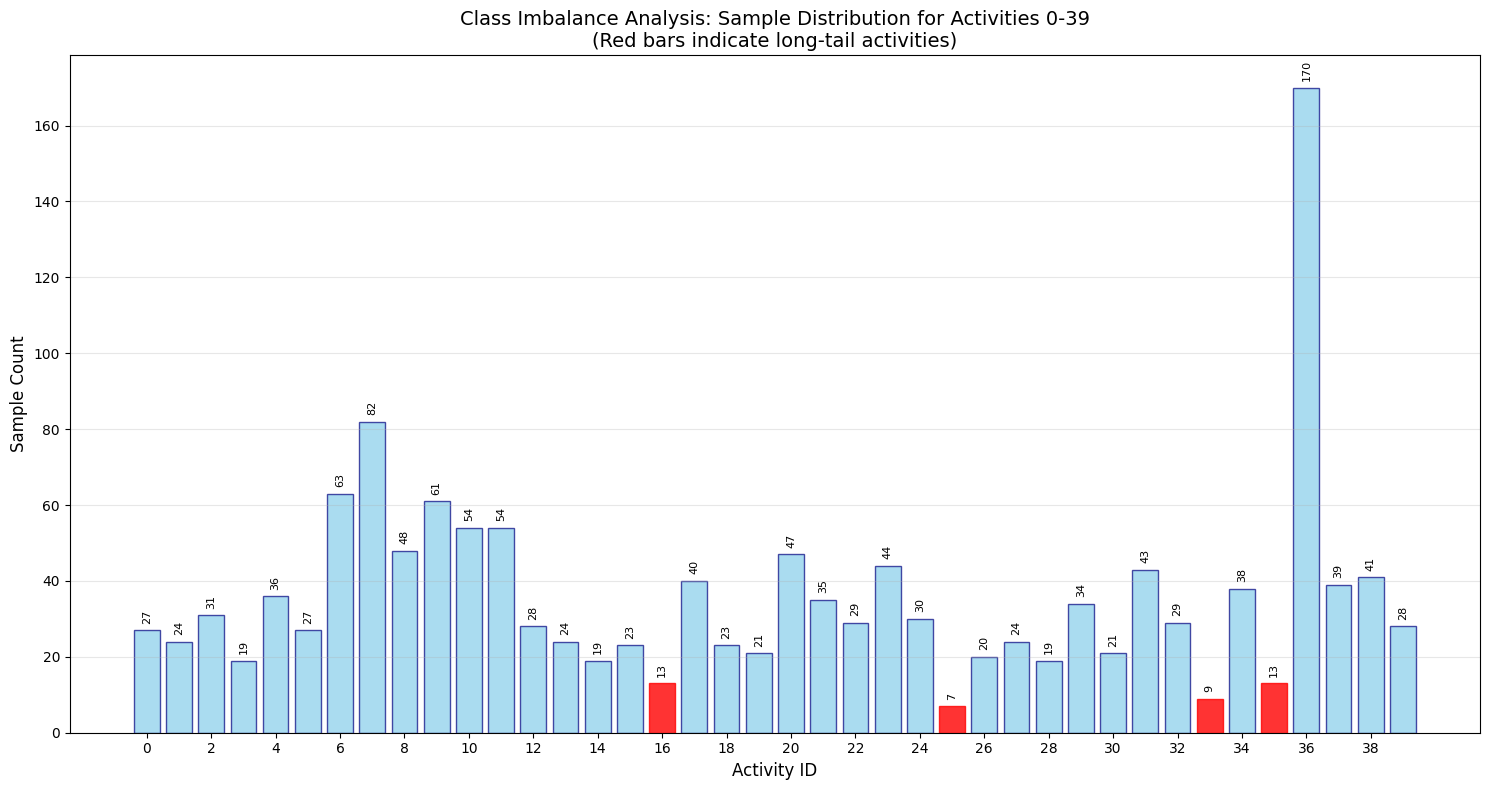


Long-tail analysis (activities with < 18.0 samples):
Number of long-tail activities: 4
Long-tail activity IDs: [16, 25, 33, 35]
Percentage of long-tail activities: 10.0%

Class imbalance ratio (max/min): 24.29


In [7]:
# analyze the class imbalance of the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the dataset
dataset_path = 'imu_files_all_complete_with_device_count_filtered.csv'
df = pd.read_csv(dataset_path)

# Count samples for each activity_id_num (0-39)
activity_counts = df['activity_id_num'].value_counts().sort_index()

# Filter to only include activities 0-39
activity_counts_filtered = activity_counts[activity_counts.index <= 39]

# Ensure we have all activities 0-39 (fill missing ones with 0)
all_activities = pd.Series(0, index=range(40))
all_activities.update(activity_counts_filtered)

print("Activity ID sample counts (0-39):")
print(all_activities)
print(f"\nTotal samples: {all_activities.sum()}")
print(f"Mean samples per activity: {all_activities.mean():.2f}")
print(f"Standard deviation: {all_activities.std():.2f}")
print(f"Min samples: {all_activities.min()}")
print(f"Max samples: {all_activities.max()}")

# Create bar plot
plt.figure(figsize=(15, 8))
bars = plt.bar(range(40), all_activities.values, color='skyblue', edgecolor='navy', alpha=0.7)

# Highlight activities with very low sample counts (long tail)
threshold = all_activities.mean() * 0.5  # Activities with less than 50% of mean
for i, (activity_id, count) in enumerate(all_activities.items()):
    if count < threshold:
        bars[i].set_color('red')
        bars[i].set_alpha(0.8)

plt.xlabel('Activity ID', fontsize=12)
plt.ylabel('Sample Count', fontsize=12)
plt.title('Class Imbalance Analysis: Sample Distribution for Activities 0-39\n(Red bars indicate long-tail activities)', fontsize=14)
plt.xticks(range(0, 40, 2))  # Show every other activity ID to avoid crowding
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars for better readability
for i, v in enumerate(all_activities.values):
    if v > 0:  # Only show labels for non-zero values
        plt.text(i, v + max(all_activities.values) * 0.01, str(int(v)), 
                ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

# Additional analysis: Long tail statistics
long_tail_activities = all_activities[all_activities < threshold]
print(f"\nLong-tail analysis (activities with < {threshold:.1f} samples):")
print(f"Number of long-tail activities: {len(long_tail_activities)}")
print(f"Long-tail activity IDs: {list(long_tail_activities.index)}")
print(f"Percentage of long-tail activities: {len(long_tail_activities)/40*100:.1f}%")

# Calculate class imbalance ratio
max_samples = all_activities.max()
min_samples = all_activities[all_activities > 0].min()  # Exclude zero counts
imbalance_ratio = max_samples / min_samples
print(f"\nClass imbalance ratio (max/min): {imbalance_ratio:.2f}")


原始40个活动类别的样本分布:
Activity  0:   27 samples
Activity  1:   24 samples
Activity  2:   31 samples
Activity  3:   19 samples
Activity  4:   36 samples
Activity  5:   27 samples
Activity  6:   63 samples
Activity  7:   82 samples
Activity  8:   48 samples
Activity  9:   61 samples
Activity 10:   54 samples
Activity 11:   54 samples
Activity 12:   28 samples
Activity 13:   24 samples
Activity 14:   19 samples
Activity 15:   23 samples
Activity 16:   13 samples
Activity 17:   40 samples
Activity 18:   23 samples
Activity 19:   21 samples
Activity 20:   47 samples
Activity 21:   35 samples
Activity 22:   29 samples
Activity 23:   44 samples
Activity 24:   30 samples
Activity 25:    7 samples
Activity 26:   20 samples
Activity 27:   24 samples
Activity 28:   19 samples
Activity 29:   34 samples
Activity 30:   21 samples
Activity 31:   43 samples
Activity 32:   29 samples
Activity 33:    9 samples
Activity 34:   38 samples
Activity 35:   13 samples
Activity 36:  170 samples
Activity 37:   39 samp

/tmp/ipykernel_86152/2692793260.py:119: UserWarning: Glyph 36873 (\N{CJK UNIFIED IDEOGRAPH-9009}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_86152/2692793260.py:119: UserWarning: Glyph 25321 (\N{CJK UNIFIED IDEOGRAPH-62E9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_86152/2692793260.py:119: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_86152/2692793260.py:119: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_86152/2692793260.py:119: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_86152/2692793260.py:119: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_86152/2692793260.py:119: UserWarning: Glyph 34913 (\N{CJK UNIFIED I

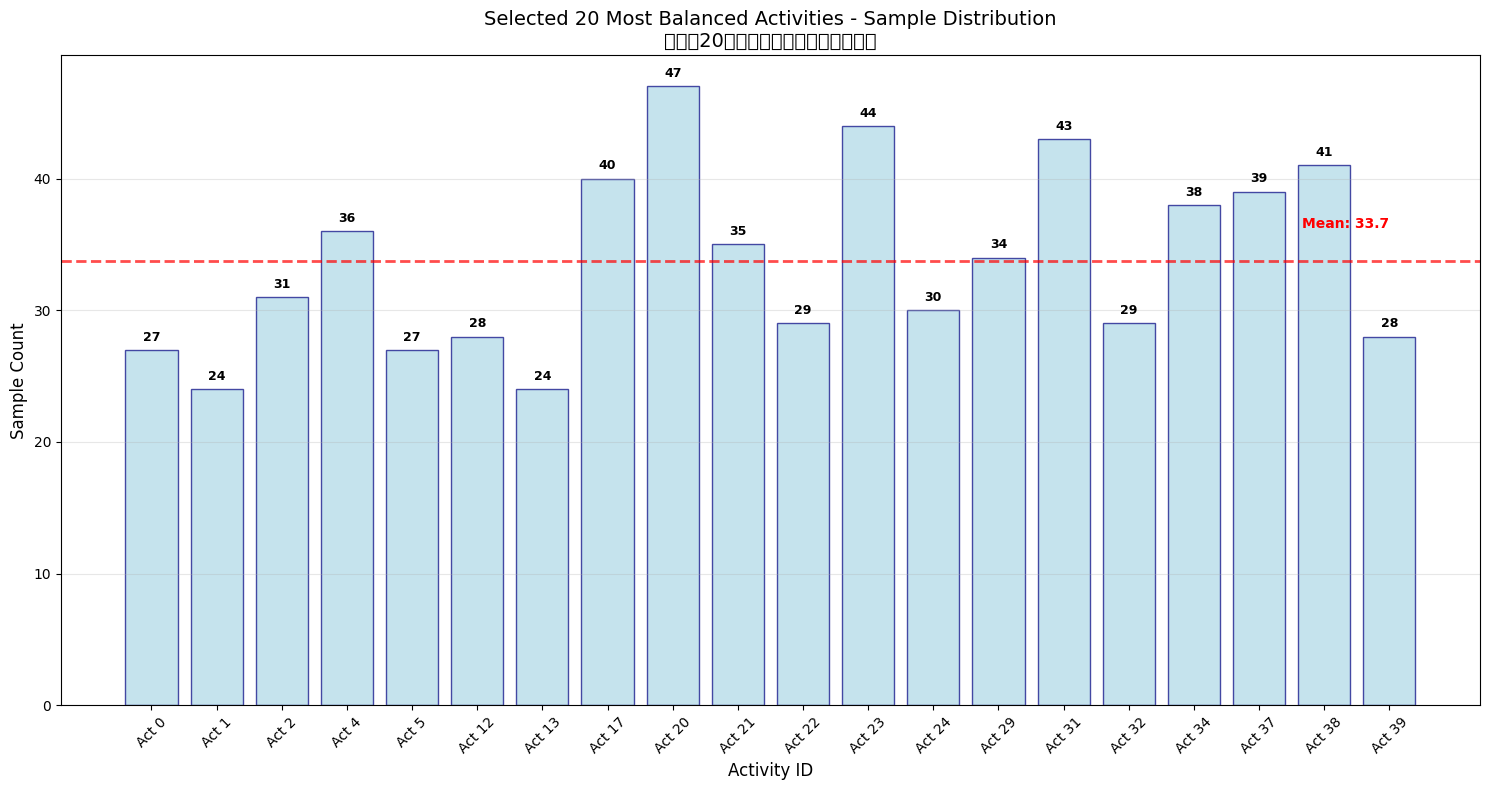

/tmp/ipykernel_86152/2692793260.py:152: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_86152/2692793260.py:152: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_86152/2692793260.py:152: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_86152/2692793260.py:152: UserWarning: Glyph 27963 (\N{CJK UNIFIED IDEOGRAPH-6D3B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_86152/2692793260.py:152: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_86152/2692793260.py:152: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_86152/2692793260.py:152: UserWarning: Glyph 21035 (\N{CJK UNIFIED I

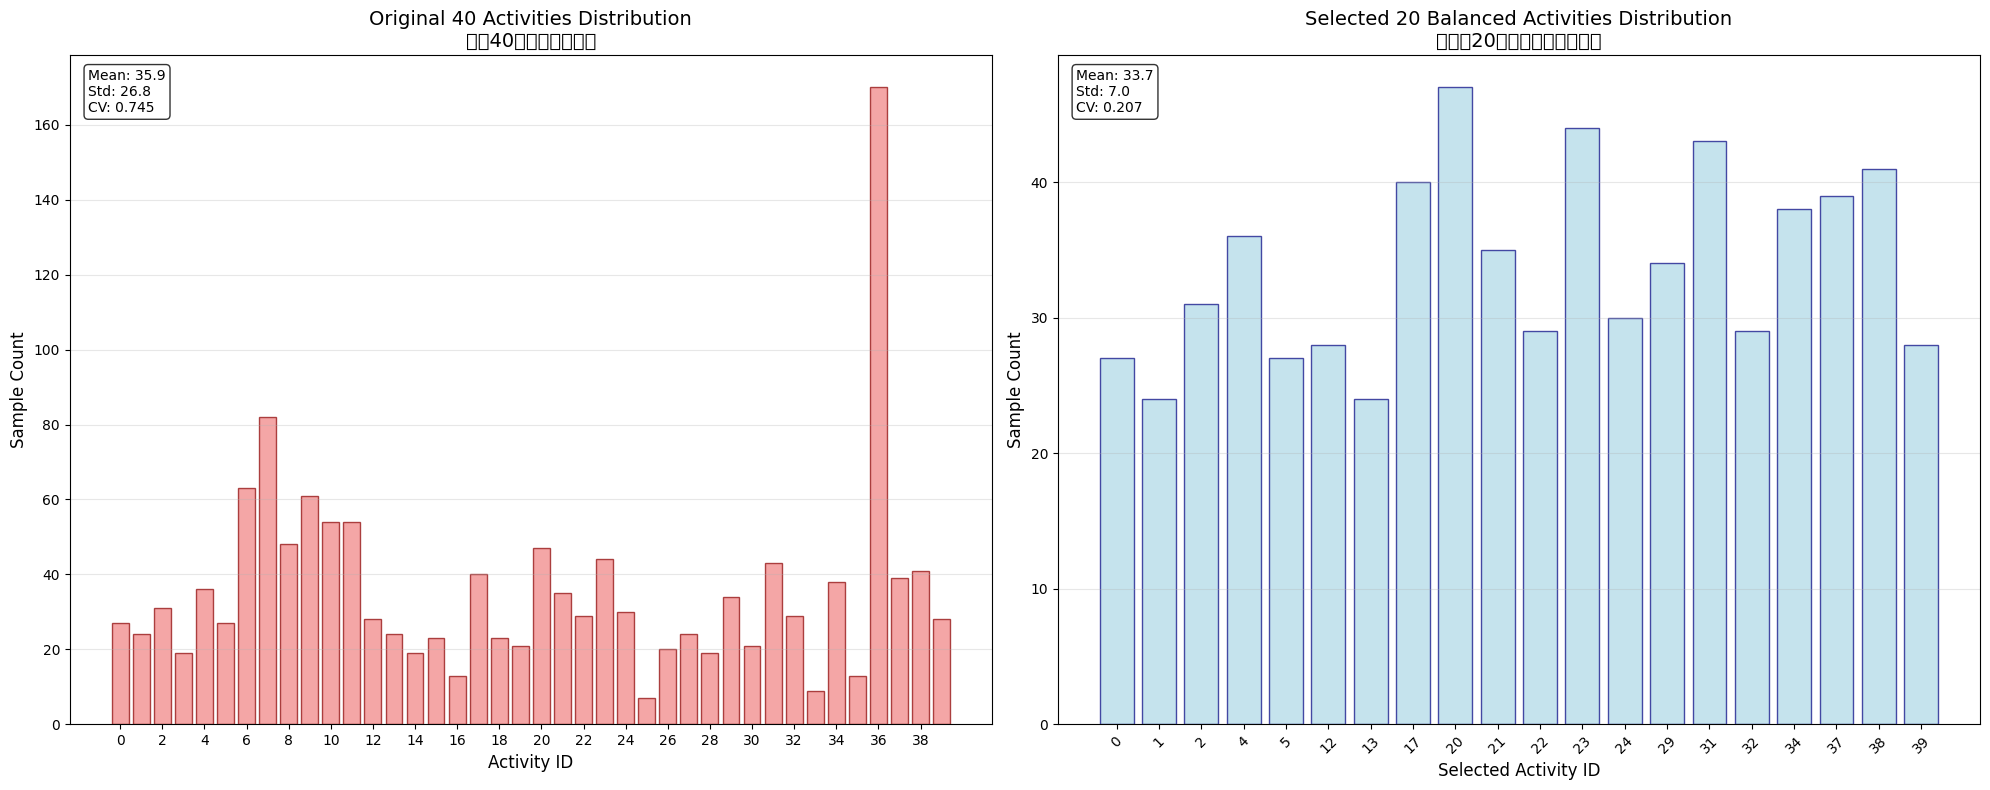


完成！已选择最平衡的20个活动类别并保存数据。
数据文件: ./imu_files_balanced_20_activities.csv
选择的活动ID: [0, 1, 2, 4, 5, 12, 13, 17, 20, 21, 22, 23, 24, 29, 31, 32, 34, 37, 38, 39]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# setting Chinese font support
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 1. Read original data and analyze class distribution
data_path = './imu_files_all_complete_with_device_count_filtered.csv'
df = pd.read_csv(data_path)

# Count the number of samples for each activity class
activity_counts = df['activity_id_num'].value_counts().sort_index()

# Ensure all activity classes 0-39 are included (fill missing with 0)
all_activities = pd.Series(0, index=range(40))
all_activities.update(activity_counts[activity_counts.index <= 39])

print("original all activities-sample distribution:")
for i in range(40):
    print(f"Activity {i:2d}: {all_activities[i]:4d} samples")

print(f"\nTotal samples: {all_activities.sum()}")
print(f"Average samples per class: {all_activities.mean():.2f}")
print(f"Standard deviation: {all_activities.std():.2f}")

# 2. Select the 20 most balanced activity classes
# Calculate the deviation of each activity class relative to the mean
mean_samples = all_activities.mean()
activity_deviation = abs(all_activities - mean_samples) / mean_samples

# Sort by deviation and select the 20 classes with the smallest deviation
balanced_activities = activity_deviation.sort_values()
selected_20_activities = balanced_activities.head(20).index.tolist()

print(f"\nSelected 20 most balanced activity classes (closest to mean {mean_samples:.1f}):")
print("Activity ID | Sample Count | Deviation from Mean | Relative Deviation")
print("-" * 70)
for activity_id in sorted(selected_20_activities):
    count = all_activities[activity_id]
    deviation = count - mean_samples
    rel_deviation = activity_deviation[activity_id]
    print(f"Activity {activity_id:2d} | {count:4d} samples | {deviation:+7.1f} | {rel_deviation:6.3f}")

print(f"\nSelected activity ID list: {sorted(selected_20_activities)}")

# 3. Filter data and save to a new CSV file
filtered_data = df[df['activity_id_num'].isin(selected_20_activities)].copy()

# Rename original activity_id_num column to activity_id_num_ori
filtered_data['activity_id_num_ori'] = filtered_data['activity_id_num']

# Create a mapping from original activity_id to new activity_id (0-19)
activity_mapping = {old_id: new_id for new_id, old_id in enumerate(sorted(selected_20_activities))}
print(f"\nActivity ID mapping:")
print("Original ID -> New ID")
print("-" * 20)
for old_id, new_id in activity_mapping.items():
    print(f"    {old_id:2d}     ->   {new_id:2d}")

# Apply mapping to create new activity_id_num column (0-19)
filtered_data['activity_id_num'] = filtered_data['activity_id_num_ori'].map(activity_mapping)

output_path = './imu_files_balanced_20_activities.csv'
filtered_data.to_csv(output_path, index=False)

print(f"\nSaved filtered data to: {output_path}")
print(f"Filtered data shape: {filtered_data.shape}")
print(f"New columns: activity_id_num_ori (original ID), activity_id_num (mapped to 0-19)")

# 4. Recount sample distribution for the selected 20 classes
selected_counts = filtered_data['activity_id_num_ori'].value_counts().sort_index()
selected_activities_series = pd.Series(0, index=sorted(selected_20_activities))
selected_activities_series.update(selected_counts)

print(f"\nSelected 20 activity classes statistics:")
print(f"Mean samples: {selected_activities_series.mean():.2f}")
print(f"Standard deviation: {selected_activities_series.std():.2f}")
print(f"Minimum samples: {selected_activities_series.min()}")
print(f"Maximum samples: {selected_activities_series.max()}")
print(f"Sample range: {selected_activities_series.max() - selected_activities_series.min()}")
print(f"Coefficient of Variation: {selected_activities_series.std()/selected_activities_series.mean():.3f}")

# 5. Plot bar chart
plt.figure(figsize=(15, 8))

# Create bar chart
activity_ids = sorted(selected_20_activities)
sample_counts = [selected_activities_series[aid] for aid in activity_ids]

bars = plt.bar(range(len(activity_ids)), sample_counts, 
               color='lightblue', edgecolor='navy', alpha=0.7, linewidth=1)

# Set chart title and labels
plt.xlabel('Activity ID', fontsize=12)
plt.ylabel('Sample Count', fontsize=12)
plt.title('Selected 20 Most Balanced Activities - Sample Distribution\nSelected 20 Most Balanced Activity Classes Sample Distribution', fontsize=14)

# Set x-axis labels
plt.xticks(range(len(activity_ids)), [f'Act {aid}' for aid in activity_ids], rotation=45)

# Add grid lines
plt.grid(axis='y', alpha=0.3)

# Add value labels above each bar
for i, (bar, count) in enumerate(zip(bars, sample_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(sample_counts) * 0.01, 
             str(int(count)), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add mean line
mean_line = selected_activities_series.mean()
plt.axhline(y=mean_line, color='red', linestyle='--', alpha=0.7, linewidth=2)
plt.text(len(activity_ids)-1, mean_line + max(sample_counts) * 0.05, 
         f'Mean: {mean_line:.1f}', ha='right', va='bottom', 
         color='red', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 6. Create comparison plots: Original 40 classes vs Selected 20 classes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Original 40 classes distribution
ax1.bar(range(40), all_activities.values, color='lightcoral', alpha=0.7, edgecolor='darkred')
ax1.set_xlabel('Activity ID', fontsize=12)
ax1.set_ylabel('Sample Count', fontsize=12)
ax1.set_title('Original 40 Activities Distribution\nOriginal 40 Activity Classes Distribution', fontsize=14)
ax1.grid(axis='y', alpha=0.3)
ax1.set_xticks(range(0, 40, 2))

# Selected 20 classes distribution
ax2.bar(range(len(activity_ids)), sample_counts, 
        color='lightblue', alpha=0.7, edgecolor='navy')
ax2.set_xlabel('Selected Activity ID', fontsize=12)
ax2.set_ylabel('Sample Count', fontsize=12)
ax2.set_title('Selected 20 Balanced Activities Distribution\nSelected 20 Balanced Activity Classes Distribution', fontsize=14)
ax2.set_xticks(range(len(activity_ids)))
ax2.set_xticklabels([f'{aid}' for aid in activity_ids], rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Add statistical information
stats_text_original = f'Mean: {all_activities.mean():.1f}\nStd: {all_activities.std():.1f}\nCV: {all_activities.std()/all_activities.mean():.3f}'
stats_text_selected = f'Mean: {selected_activities_series.mean():.1f}\nStd: {selected_activities_series.std():.1f}\nCV: {selected_activities_series.std()/selected_activities_series.mean():.3f}'

ax1.text(0.02, 0.98, stats_text_original, transform=ax1.transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax2.text(0.02, 0.98, stats_text_selected, transform=ax2.transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\nDone! Selected the most balanced 20 activity classes and saved the data.")
print(f"Data file: {output_path}")
print(f"Selected activity IDs: {sorted(selected_20_activities)}")